### Introduction

This project will explore dataset obtained from a German car sales website. There is a significant amount of data cleaning to be executed; where the data integrity is questionable we will exclude the data.

#**We will start by importing relevant libraries**

---

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning (for modeling, if needed)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Additional libraries for specific tasks (optional):
# - Interactive visualization
# import plotly.express as px
# import bokeh

# Make sure to install these libraries using:
# pip install pandas numpy matplotlib seaborn scikit-learn plotly bokeh nltk


# **This will be followed by importing the csv file**

---

In [2]:
# Read the CSV file into a pandas DataFrame and display first few rows
car_df = pd.read_csv("C:/Users/okusa/OneDrive/Desktop/Data.csv")
car_df.head(3)

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916


Can begin exploring shape, info and columns of the dataset to aid the cleaning process

In [3]:
#We can obtain the number of rows and columns using this function
car_df.shape
print("Number of rows: ", car_df.shape[0])
print("Number of columns: ", car_df.shape[1])

Number of rows:  251079
Number of columns:  15


In [4]:
#initial explorartion of my data.. 15 columns?
#car_df.dtypes
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

In [5]:
#Identify total number of duplicated values
#  car_df.drop_duplicates(inplace=True) if you needed to drop
car_df.duplicated().sum()


0

In [6]:
#Noticed a few cells with 'unkown' & '?'
car_df.replace("Unknown", np.nan, inplace = True)
car_df.replace("?", np.nan, inplace = True)
car_df.isnull().sum()

Unnamed: 0                      0
brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                   0
power_kw                      134
power_ps                      129
transmission_type            1144
fuel_type                      96
fuel_consumption_l_100km    26873
fuel_consumption_g_km           1
mileage_in_km                 152
offer_description               1
dtype: int64

In [7]:
#Updating the datatypes of below columns
car_df[['power_kw', 'mileage_in_km', 'price_in_euro', 'year']] = car_df[['power_kw', 'mileage_in_km', 'price_in_euro', 'year']].apply(pd.to_numeric, errors = 'coerce')
car_df.dtypes

Unnamed: 0                    int64
brand                        object
model                        object
color                        object
registration_date            object
year                        float64
price_in_euro               float64
power_kw                    float64
power_ps                     object
transmission_type            object
fuel_type                    object
fuel_consumption_l_100km     object
fuel_consumption_g_km        object
mileage_in_km               float64
offer_description            object
dtype: object

In [8]:
#Total null values
car_df.isnull().sum()

#Checking the percentage of null values
pctnge = car_df.isnull().sum()/ len(car_df) * 100
pctnge

Unnamed: 0                   0.000000
brand                        0.000000
model                        0.000000
color                        0.066115
registration_date            0.001593
year                         0.077665
price_in_euro                0.079258
power_kw                     0.116696
power_ps                     0.051378
transmission_type            0.455633
fuel_type                    0.038235
fuel_consumption_l_100km    10.703006
fuel_consumption_g_km        0.000398
mileage_in_km                0.060539
offer_description            0.000398
dtype: float64

In [9]:
#Remove/Replace the null values in the dataset
car_df.dropna(subset=['registration_date', 'color', 'offer_description', 'transmission_type', 'fuel_type'], inplace = True)
car_df['power_kw'].fillna(car_df['power_kw'].mean(), inplace = True)
car_df['mileage_in_km'].fillna(car_df['mileage_in_km'].mean(), inplace = True)
car_df['price_in_euro'].fillna(car_df['price_in_euro'].mean(), inplace = True)
car_df['year'].fillna(car_df['year'].mean(), inplace = True)

In [10]:
#Verify if anymore null values were added
car_df.isnull().sum()

Unnamed: 0                      0
brand                           0
model                           0
color                           0
registration_date               0
year                            0
price_in_euro                   0
power_kw                        0
power_ps                      120
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26412
fuel_consumption_g_km           0
mileage_in_km                   0
offer_description               0
dtype: int64

In [11]:
#Dropping columns 'registration_date'
car_df.drop(columns= ['Unnamed: 0','power_ps','fuel_consumption_g_km','fuel_consumption_l_100km', 'offer_description'], inplace=True, axis=1)

In [12]:
car_df.isnull().sum()

brand                0
model                0
color                0
registration_date    0
year                 0
price_in_euro        0
power_kw             0
transmission_type    0
fuel_type            0
mileage_in_km        0
dtype: int64

**Standardise columns to get them in the useful units**

In [13]:
#transform km to miles by mathematical operation (multiply km by 0.621371)
#car_df['mileage_in_km'] = (car_df['mileage_in_km'] * 0.621371).round(2)
#We will have an additional column for a £ price comparison (multiply euro by 0.86)
#car_df['Price in £'] = car_df['price_in_euro'] * 0.86
#I need power to be in BHP
#car_df['power_kw'] = (car_df['power_kw'] * 1.34102).round(2)


In [14]:
#Rename the columns
#'power_kw': 'Power (BHP)', 'mileage_in_km': 'Mileage(miles)'
car_df.rename(columns={ 'price_in_euro': 'price_EURO', 'fuel_type': 'Fuel_Type', 'transmission_type': 'Transmission',}, inplace=True)

In [15]:
car_df.columns

Index(['brand', 'model', 'color', 'registration_date', 'year', 'price_EURO',
       'power_kw', 'Transmission', 'Fuel_Type', 'mileage_in_km'],
      dtype='object')

In [16]:
#For some reason, there are a bunch of non numeric values in the year column. All to be dropped.
car_df['year'] = pd.to_numeric(car_df['year'], errors = 'coerce')
car_df = car_df.dropna(subset=['year'])
car_df.reset_index(drop=True, inplace=True)

car_df = car_df[~(car_df['year'] > 2023)] #Removing random values above the year 2023. Could be worth converting to car age rather than year

In [17]:
# A function has been created to iterate through the reg_date column and apply the strptime method
# This will subsequently be deducted from the details derived from the same applied to the end date
# Somehow produces a number of days which is divided by 365 to return age_yr

def car_age(reg_date, end_date):
  try:
    bravo = datetime.strptime(reg_date, '%m/%Y')
    gamma = datetime.strptime(end_date, '%m/%Y')

    age = gamma - bravo
    age_yr = round(age.days/365, ndigits = 1)
    return age_yr
  except:
    return np.NaN

end_date = '02/2024'
car_df['Car_Age'] = car_df['registration_date'].apply(car_age, end_date=end_date)



In [18]:
car_df.columns

Index(['brand', 'model', 'color', 'registration_date', 'year', 'price_EURO',
       'power_kw', 'Transmission', 'Fuel_Type', 'mileage_in_km', 'Car_Age'],
      dtype='object')

In [19]:
car_df.drop(columns = ['registration_date'], axis =1 , inplace = True)

In [20]:
car_df.columns

Index(['brand', 'model', 'color', 'year', 'price_EURO', 'power_kw',
       'Transmission', 'Fuel_Type', 'mileage_in_km', 'Car_Age'],
      dtype='object')

In [21]:
car_df['Fuel_Type'].unique()
#Also a bunch of random values in the Fuel Type column, filtered for the columns below only

array(['Petrol', 'Diesel', 'Hybrid', 'LPG', 'Other', '07/2004',
       '74.194 km', '110.250 km', '06/2014', 'CNG', 'Diesel Hybrid',
       '12/2016', 'Automatic', 'Electric', '12/2019', '06/2023',
       'Ethanol', 'Manual', '300.000 km', '264.000 km', '108.313 km',
       '05/2009', '180.000 km', '04/2013', '03/2014', '08/2014',
       '01/2016', '03/2017', '04/2008', '07/2007', '145.500 km',
       '12/2012', '10/2022', '06/2004', '09/2009', '12/2014', '02/2017',
       '12890', '11/2018', '08/2018', '03/2019', '11/2021', '20.600 km',
       'Hydrogen', '07/2022', '05/2015', '03/2018', '04/2022',
       '160.629 km', '144.919 km', '02/1996', '04/2000', '200.000 km',
       '06/2009', '185.500 km', '13000', '05/2012', '11/2014', '10/2015',
       '350.000 km', '49.817 km', '34900', '35.487 km', '03/2021',
       '26890', '26990', '4.000 km', '11/2005', '07/2005', '08/2011',
       '02/2011', '03/2011', '10/2013', '09/2015', '02/2018', '02/2023',
       '08/2017', '99.900 km', '30.450

In [22]:
selected_fuels = ['Petrol', 'Diesel', 'Hybrid', 'Diesel Hybrid', 'Electric']
car_df = car_df[car_df['Fuel_Type'].isin(selected_fuels)]


In [23]:
car_df['Transmission'].unique()
#Changing all semi-auto transmission type to auto

array(['Manual', 'Automatic', 'Semi-automatic'], dtype=object)

In [24]:
def trans_transmission(transmission):
  if transmission == 'Semi-automatic':
    return 'Automatic'
  else:
    return transmission


car_df['Transmission'] = car_df['Transmission'].apply(lambda transmission: trans_transmission(transmission))

In [25]:
#rearrange the columns for better viewing
car_df = car_df.iloc[:, [0, 1, 6, 7, 3, 5, 8, 4, 2, 9]]
car_df.head(3)

,brand,model,Transmission,Fuel_Type,year,power_kw,mileage_in_km,price_EURO,color,Car_Age
0,alfa-romeo,Alfa Romeo GTV,Manual,Petrol,1995.0,148.0,160500.0,1300.0,red,28.4
1,alfa-romeo,Alfa Romeo 164,Manual,Petrol,1995.0,191.0,190000.0,24900.0,black,29.0
2,alfa-romeo,Alfa Romeo Spider,Manual,Petrol,1995.0,110.0,189500.0,4900.0,black,28.6


# EXPLORATORY DATA ANAYLYSIS

---


# **Brand Analysis**

### This will explore 
    * the distribution of Brands , 
    * Average Prices and how it varies across the Brands
    * Dominant brands to be highlighted?

---

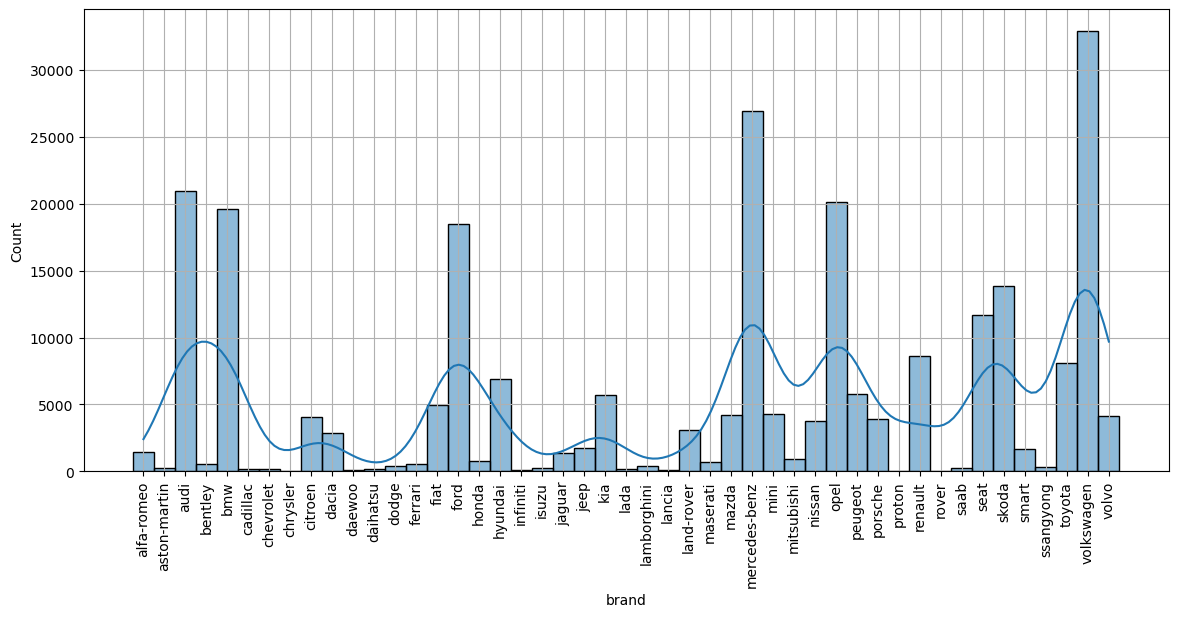

In [26]:
#car_df['brand'].hist(bins = 100, figsize = (14, 8))
# plt.xticks(rotation = 90)
# plt.show()

plt.figure(figsize=(14,6))
sns.histplot(data = car_df, x = 'brand', bins = 100, kde=True)
plt.xticks(rotation = 90)

plt.grid()
plt.show()

I want to do an auction to get these cars off our database and out of storage, no demand, value or use for them.

The most/least populated cars based on model

In [27]:
brand = pd.DataFrame(car_df['brand'].value_counts()).reset_index().head(20)
brand.columns = ['Brand', 'Count per Brand']

brand_b = pd.DataFrame(car_df['brand'].value_counts()).reset_index().tail(20)
brand_b.columns = ['Brand', 'Count' ]
brand_b = brand_b.sort_values(by = 'Count', ascending = True)

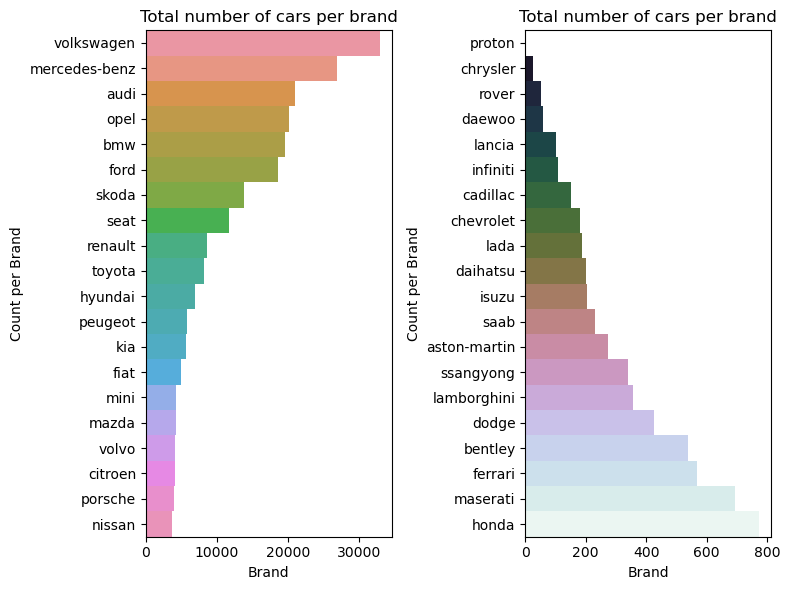

In [28]:
fig, ax = plt.subplots(1,2, figsize=(8, 6))

sns.barplot(ax = ax[0], y='Brand', x='Count per Brand', data=brand, width=1)
ax[0].set_xlabel('Brand')
ax[0].set_ylabel('Count per Brand')
ax[0].set_title('Total number of cars per brand')

sns.barplot(ax = ax[1], y='Brand', x='Count', data=brand_b, palette='cubehelix', width=1)
ax[1].set_xlabel('Brand')
ax[1].set_ylabel('Count per Brand')
ax[1].set_title('Total number of cars per brand')

plt.tight_layout()
plt.show()


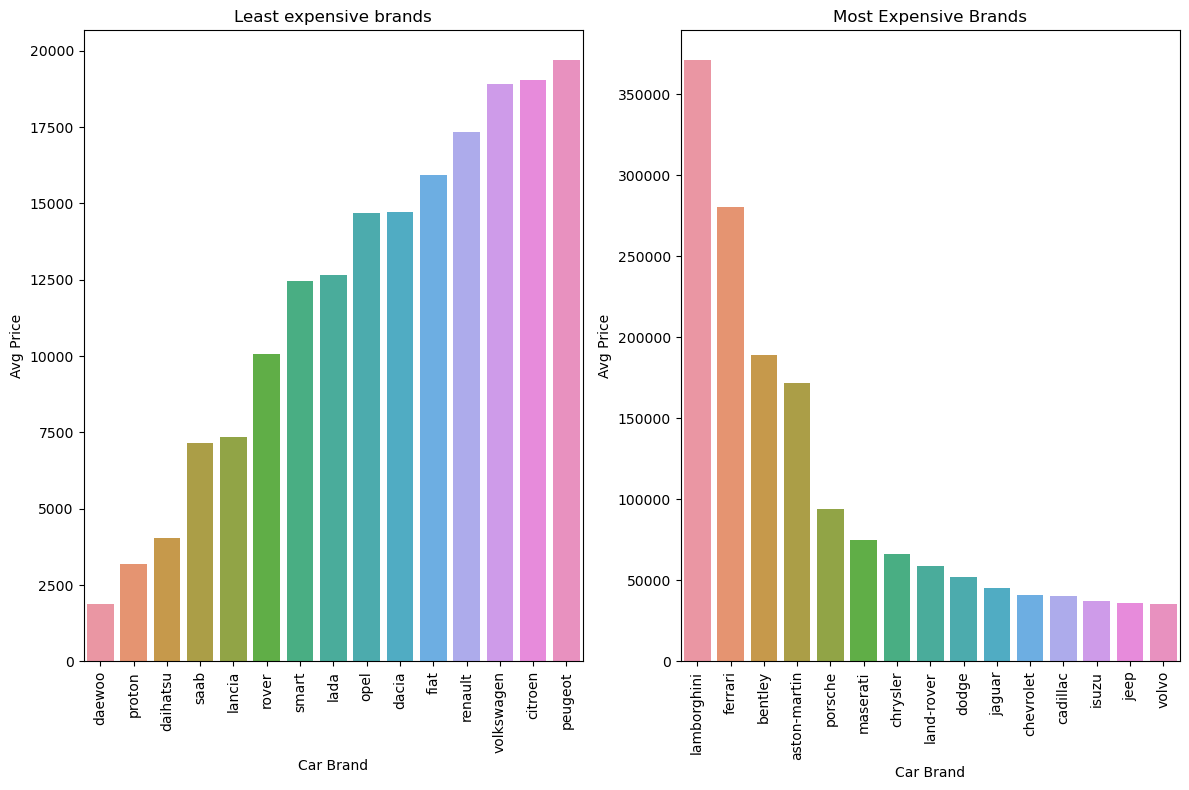

In [29]:
top_brand = car_df.groupby('brand')[['price_EURO', 'mileage_in_km', 'Car_Age']].mean().round(2).sort_values(by='price_EURO', ascending=False)
top_brand = top_brand.reset_index()

bott_brand = car_df.groupby('brand')[['price_EURO', 'mileage_in_km', 'Car_Age']].mean().round(2).sort_values(by='price_EURO', ascending=True)
bott_brand = bott_brand.reset_index()

fig, ax = plt.subplots(1,2, figsize = (12, 8))

sns.barplot(ax = ax [1], x = 'brand', y = 'price_EURO', data = top_brand.head(15))
ax[1].set_title('Most Expensive Brands')
ax[1].set_xlabel('Car Brand')
ax[1].set_ylabel('Avg Price')
ax[1].tick_params(axis='x', rotation=90)


sns.barplot(ax = ax [0], x = 'brand', y = 'price_EURO', data = bott_brand.head(15))
ax[0].set_title('Least expensive brands')
ax[0].set_xlabel('Car Brand')
ax[0].set_ylabel('Avg Price')
ax[0].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [30]:
model = pd.DataFrame(car_df['model' ].value_counts()).reset_index().head(10)
model

,model,count
0,Volkswagen Golf,7521
1,Opel Astra,4312
2,Opel Corsa,4232
3,SEAT Leon,4042
4,Ford Focus,3838
5,Skoda Octavia,3772
6,Audi A3,3520
7,Audi A4,3355
8,Volkswagen Polo,3117
9,Audi A6,2862


### **Transmission**

***Scatter plot visualising car age/mileage_in_km, price and Transmission***

In [31]:
car_df.columns

Index(['brand', 'model', 'Transmission', 'Fuel_Type', 'year', 'power_kw',
       'mileage_in_km', 'price_EURO', 'color', 'Car_Age'],
      dtype='object')

In [32]:
car_df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

How does Transmission affect Price?
***Avg price of Auto is now higher than Manual across the fleets***

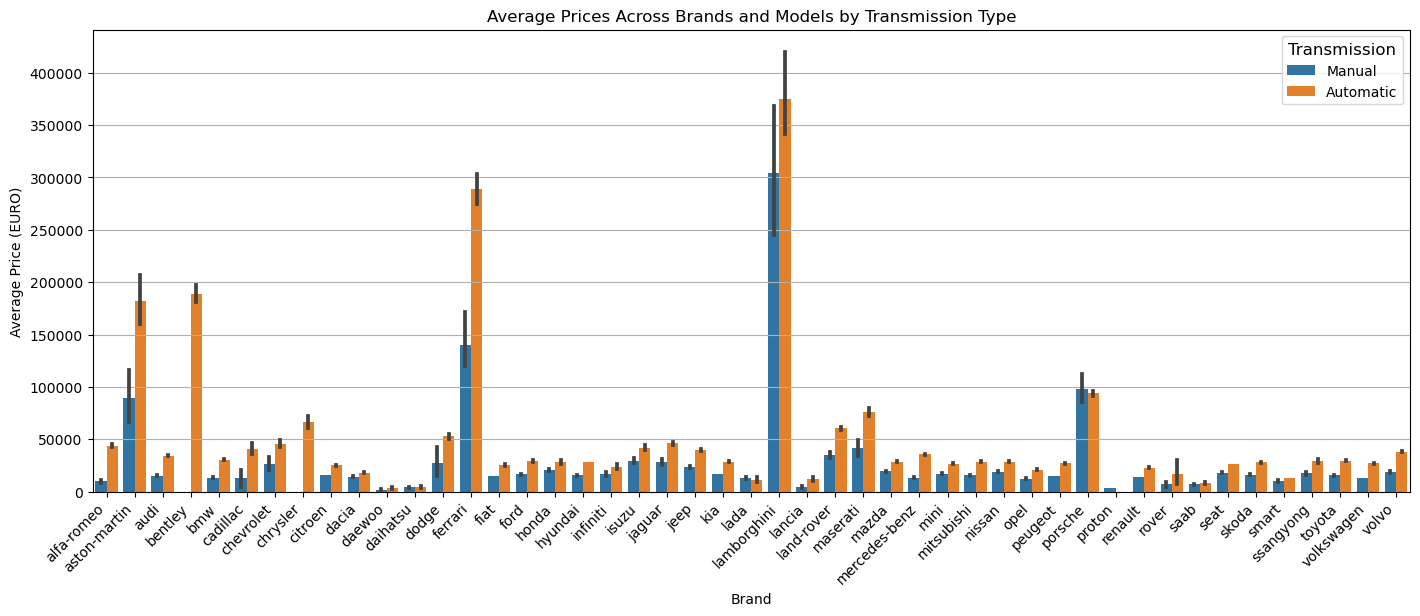

In [33]:
plt.figure(figsize=(17, 6))

sns.barplot(x='brand', y='price_EURO', hue='Transmission', data=car_df)

plt.title('Average Prices Across Brands and Models by Transmission Type')
plt.xlabel('Brand')
plt.ylabel('Average Price (EURO)')
plt.legend(title='Transmission', title_fontsize='12')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')  # Optional: Add horizontal grid lines for better readability

plt.show()

***We stock more Autos than manual which is good and follows market trend***

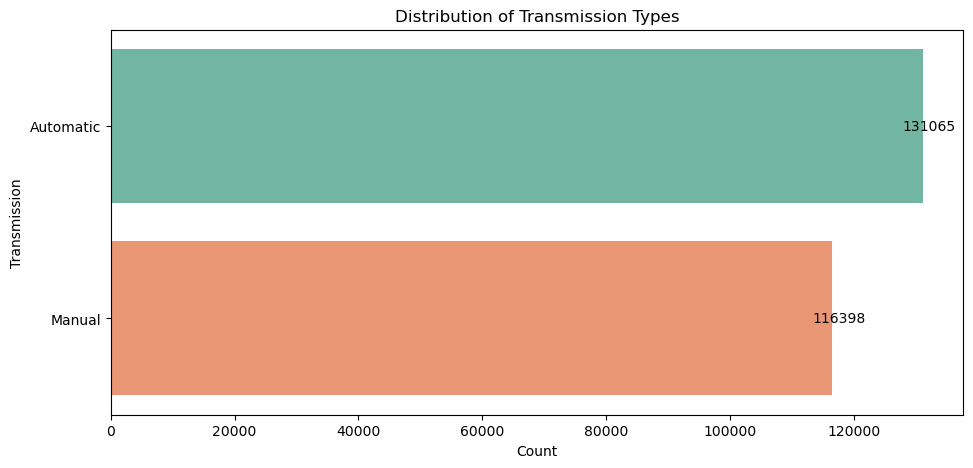

In [34]:
plt.figure(figsize = (11, 5))
ax = sns.barplot(y =car_df['Transmission'].value_counts().index, x = car_df['Transmission'].value_counts(), palette = sns.color_palette('Set2'))

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(5, 0), textcoords='offset points', fontsize=10)

plt.xlabel('Count')
plt.ylabel('Transmission')
plt.title('Distribution of Transmission Types')
plt.show()

### **Fuel Type**

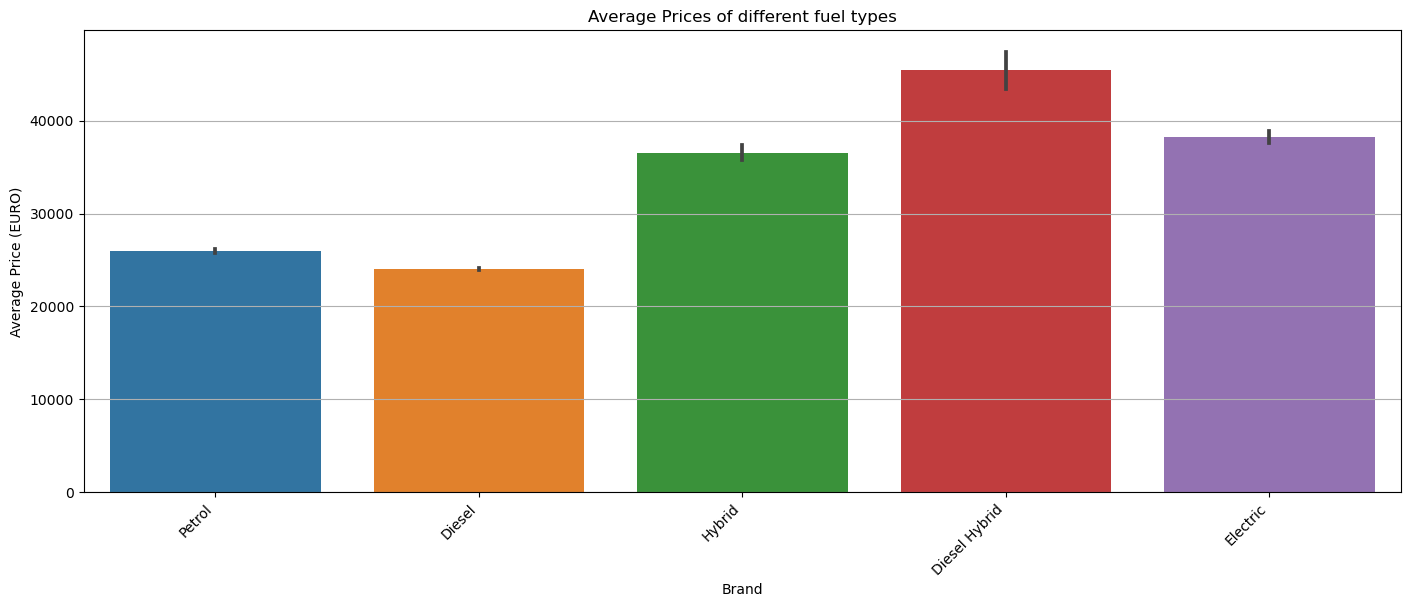

In [35]:
plt.figure(figsize=(17, 6))

sns.barplot(x='Fuel_Type', y='price_EURO', data=car_df)

plt.title('Average Prices of different fuel types')
plt.xlabel('Brand')
plt.ylabel('Average Price (EURO)')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')  # Optional: Add horizontal grid lines for better readability

plt.show()

***Top N electric cars listed on the platform. Comparison to market demands shows a way of. Can implement focus on matching higher number of vehicles in respective fleet to that which market is looking for.***
**Link article showing top PHEV/BEV in Germany



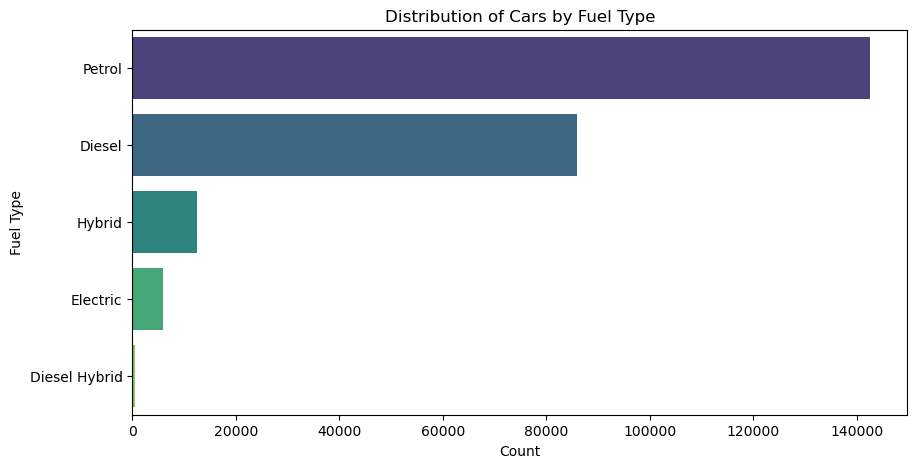

In [36]:
#sns.countplot(x = 'Fuel_Type', data = car_df)
hybrid = pd.DataFrame(car_df[car_df['Fuel_Type'] == 'Hybrid'].groupby(['brand', 'model'])[['Fuel_Type', 'Car_Age', 'mileage_in_km']].size().reset_index(name='Hybrid Car Count'))
hybrid = hybrid.sort_values(by = 'Hybrid Car Count', ascending = False).reset_index(drop=True)

plt.figure(figsize=(10, 5))
sns.barplot(y=car_df['Fuel_Type'].value_counts().index, x=car_df['Fuel_Type'].value_counts(), palette='viridis')

plt.xlabel('Count')
plt.ylabel('Fuel Type')
plt.title('Distribution of Cars by Fuel Type')
plt.show()


***Here, we are interested in our sustainable fleet; as PHEV and EV are still categorised seperately, there are seperate graphs to visualise the most Xpensive model type and brands***

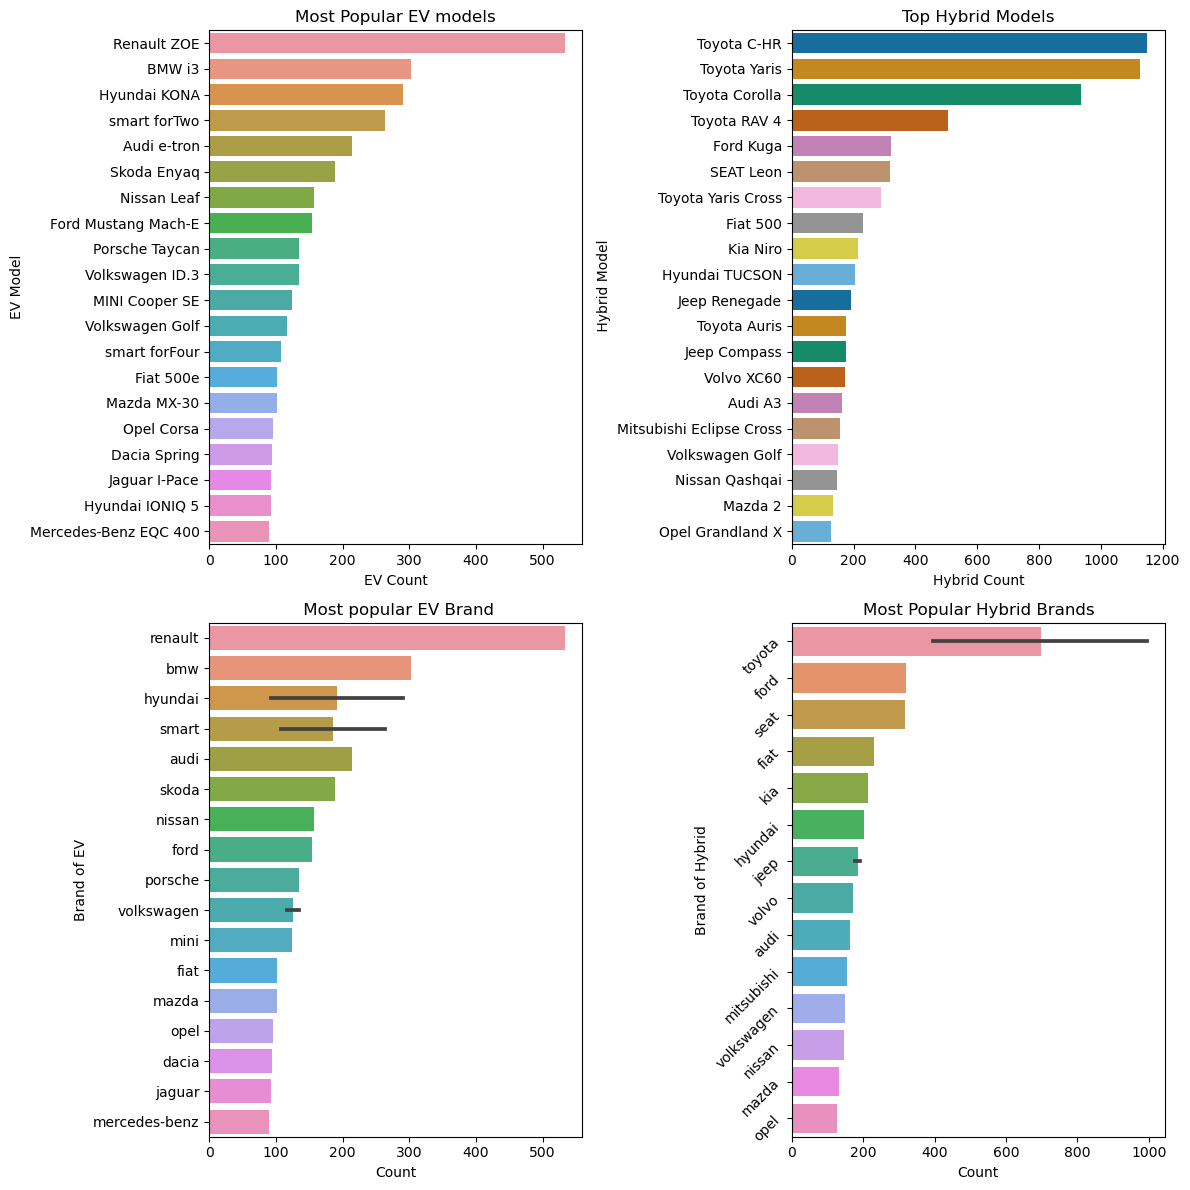

In [37]:
#[0,0  0,1  etc allow the arrangement of each plot on the axis]
electric = pd.DataFrame(car_df[car_df['Fuel_Type'] == 'Electric'].groupby(['brand', 'model'])[['Fuel_Type']].size().reset_index(name='Electric Car Count'))
electric = electric.sort_values(by = 'Electric Car Count', ascending = False).reset_index(drop=True)

fig, ax = plt.subplots(2,2, figsize = (12, 12))


clr_1 = sns.color_palette("husl", n_colors=len(electric['brand'].unique()))
clr_2 = sns.color_palette("Set2", n_colors=len(hybrid['brand'].unique()))

sns.barplot(ax = ax [0,0], data = electric.head(20), x = 'Electric Car Count', y = 'model', dodge = True)
ax[0,0].set_ylabel("EV Model")
ax[0,0].set_xlabel("EV Count")
ax[0,0].set_title("Most Popular EV models")
plt.yticks(rotation = 45)

sns.barplot(ax = ax [0,1], data = hybrid.head(20), x = 'Hybrid Car Count', y = 'model', dodge = True, palette  = 'colorblind')
ax[0,1].set_ylabel(" Hybrid Model")
ax[0,1].set_xlabel("Hybrid Count")
ax[0,1].set_title("Top Hybrid Models")
plt.yticks(rotation = 45)

sns.barplot(ax = ax [1,0], data = electric.head(20), x = 'Electric Car Count', y = 'brand',)
ax[1,0].set_ylabel('Brand of EV')
ax[1,0].set_xlabel('Count')
ax[1,0].set_title(' Most popular EV Brand')
plt.yticks(rotation = 45)

sns.barplot(ax = ax [1,1], data = hybrid.head(20), x = 'Hybrid Car Count', y = 'brand', dodge = True)
ax[1,1].set_ylabel("Brand of Hybrid")
ax[1,1].set_xlabel("Count")
ax[1,1].set_title("Most Popular Hybrid Brands")
plt.yticks(rotation = 45)

plt.tight_layout()
plt.show()

All these diesel cars, you know there's been a ban on diesular vehicles rights?

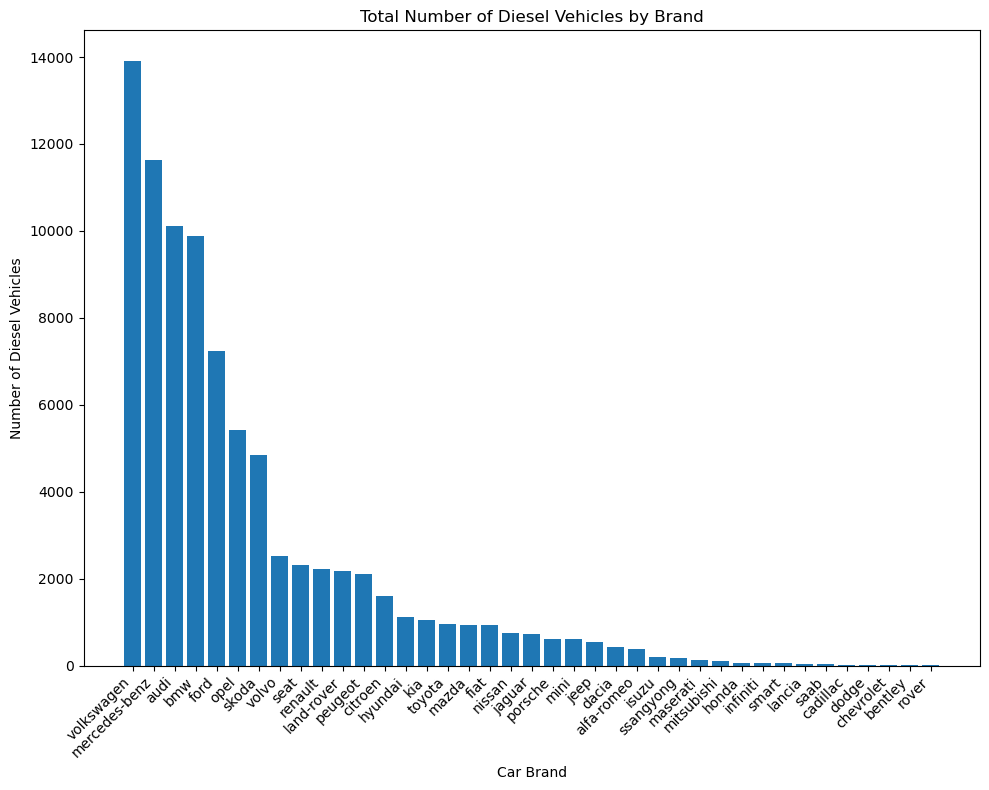

In [38]:
diesel_counts = pd.DataFrame({'Diesel_Count': car_df[car_df['Fuel_Type'] == 'Diesel'].groupby('brand')['Fuel_Type'].value_counts()})
diesel_counts = diesel_counts.sort_values(by='Diesel_Count', ascending=False).reset_index()

plt.figure(figsize=(10, 8))
plt.bar(diesel_counts['brand'], diesel_counts['Diesel_Count'])
plt.title('Total Number of Diesel Vehicles by Brand')
plt.xlabel('Car Brand')
plt.ylabel('Number of Diesel Vehicles')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()




## Exploring my Numerical Values

### Price Analysis


|**Distribution of PRICE**|                         |
|-------------------------|-------------------------|
|What is this showing ?   | This is showing that cars priced within the 10 - 30k mark are attracting the most attention
 


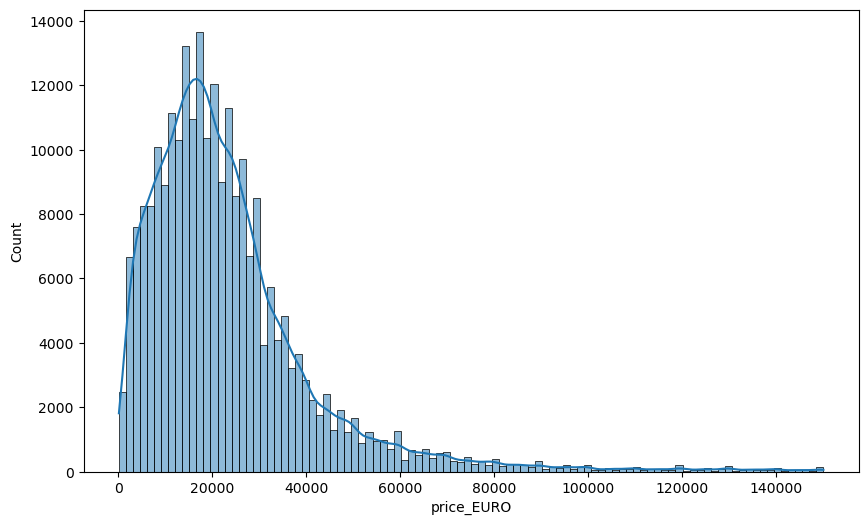

In [39]:
plt.figure(figsize=(10,6))
sns.histplot(data = car_df[car_df['price_EURO']<150000], x = 'price_EURO', bins = 100, kde=True)
plt.show()

**Distribution of POWER_KW** Though maybe deleted as irrelevant

### Mileage vs Price   

---

In [40]:
# # @title price_EURO vs mileage_in_km

# avg_price.plot(kind='scatter', x='mileage_in_km', y='price_EURO',  s=32, alpha=.8)

# plt.ylim(0, 90000)
# plt.gca().spines[['top', 'right',]].set_visible(False)

# plt.grid()
# plt.show()

|**Distribution of MILEAGE**|                         |
|-------------------------|-------------------------|
|What is this showing ?   | Focus is on miles < 50k
 


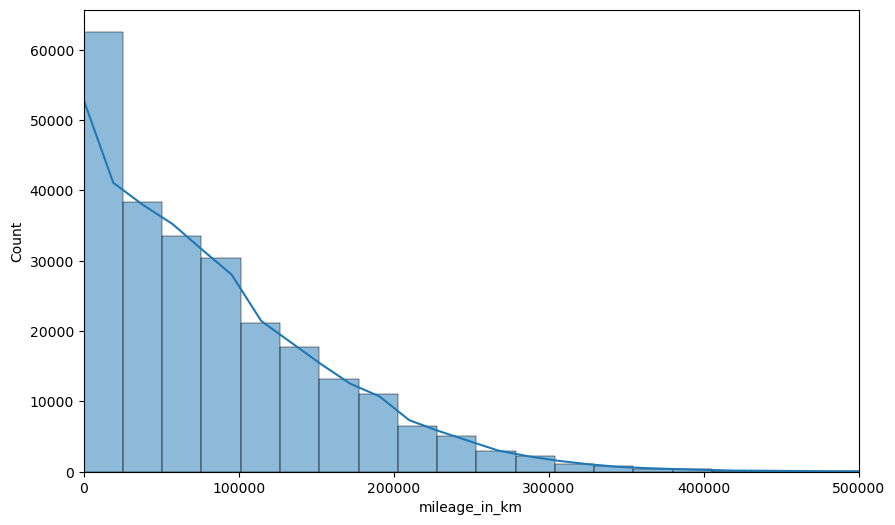

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(data= car_df, x = 'mileage_in_km', bins = 150, kde=True)
plt.xlim(0, 500000)
plt.show()

Also explores how Transmission correlates with Price based on the mileage 

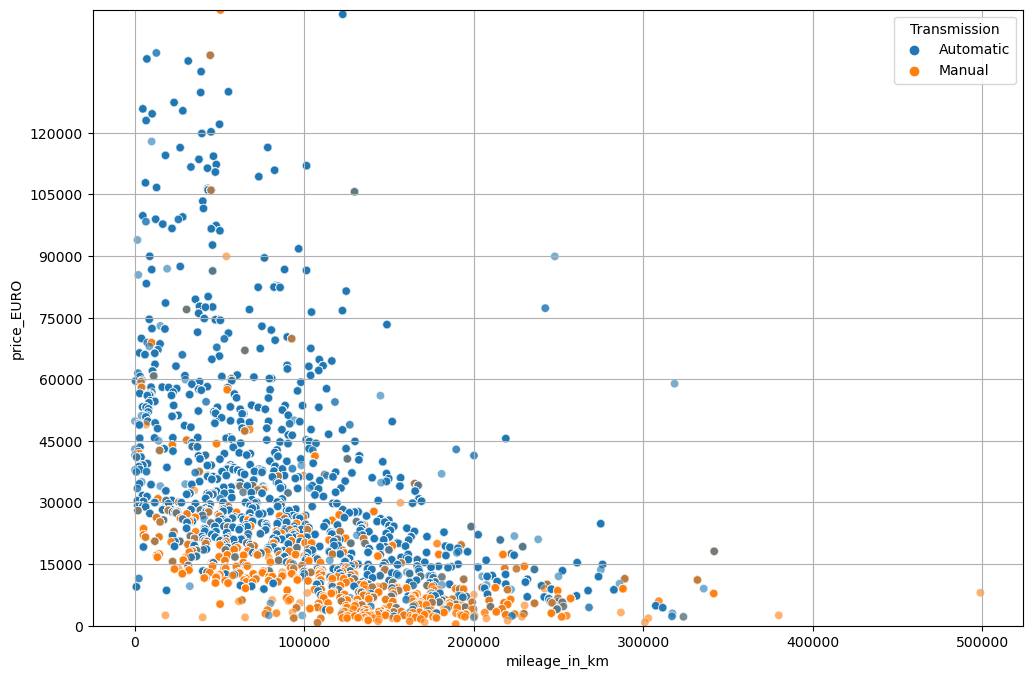

In [42]:
avg_price = car_df.groupby('model')[['price_EURO', 'mileage_in_km', 'Car_Age']].mean().round(2).sort_values(by='price_EURO', ascending=False)
avg_price = avg_price.reset_index()

avg_price = avg_price.merge(car_df[['model', 'Transmission']], on = 'model')
# for when you want to set the hue = Transmission

plt.figure(figsize = (12,8))
sns.scatterplot(x = 'mileage_in_km', y = 'price_EURO',data=avg_price, alpha = 0.6, hue = 'Transmission')


plt.ylim(0, 150000)

plt.yticks(range(0, 130001, 15000))

plt.grid()
plt.show()

### Car Age
---


|**Distribution of Age**|                         |
|-------------------------|-------------------------|
|What is this showing ?   | Focus is on miles < 50k
 


<function matplotlib.pyplot.show(close=None, block=None)>

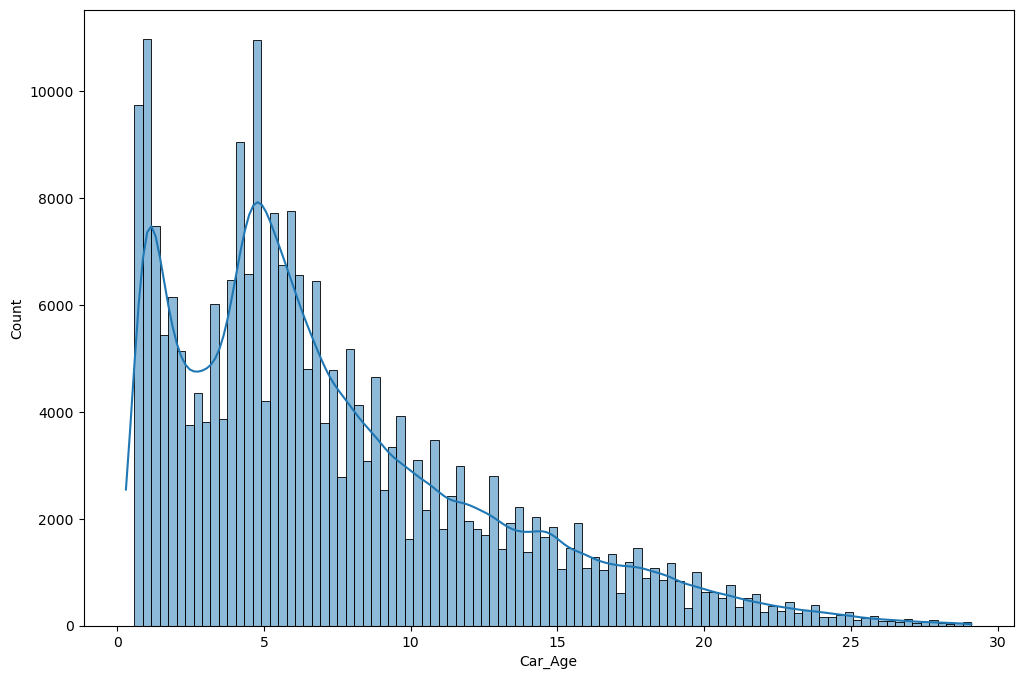

In [43]:
plt.figure(figsize=(12, 8))

sns.histplot(data=car_df, x = 'Car_Age', bins = 100, kde = True)
plt.show

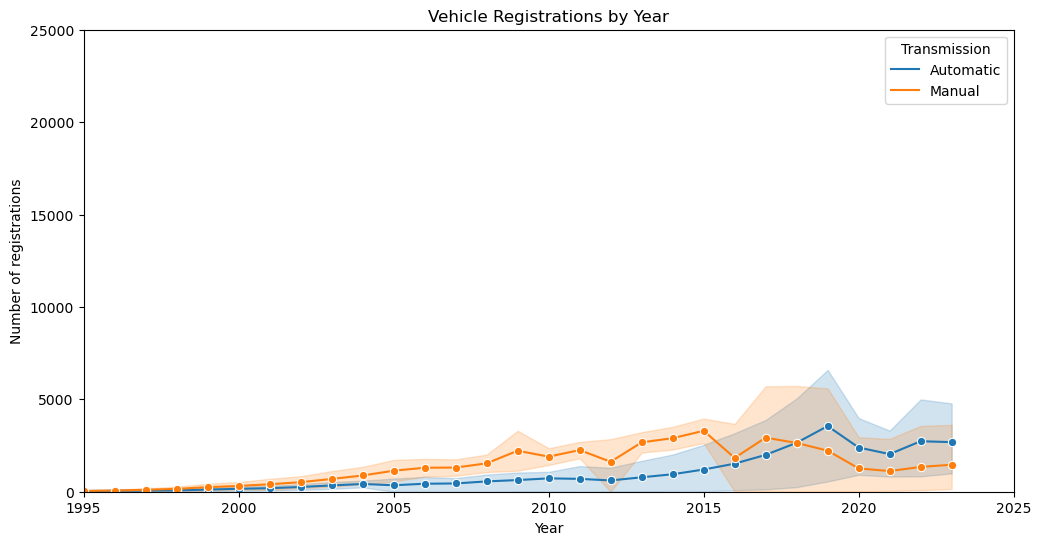

In [44]:
registrations_by_year = car_df.groupby(['year', 'Transmission', 'Fuel_Type']).size().reset_index(name='Registrations')
       
plt.figure(figsize =(12, 6))
sns.lineplot(x = 'year', y = 'Registrations', marker = 'o', data = registrations_by_year, linewidth = 1.5, hue = 'Transmission')
             
plt.title('Vehicle Registrations by Year')
plt.xlabel('Year')
plt.ylabel('Number of registrations')

plt.xlim(1995, 2025)
plt.ylim(0,25000)
plt.show()

In [45]:
registrations_by_year.head()

,year,Transmission,Fuel_Type,Registrations
0,1995.0,Automatic,Diesel,4
1,1995.0,Automatic,Petrol,71
2,1995.0,Manual,Diesel,14
3,1995.0,Manual,Petrol,75
4,1996.0,Automatic,Diesel,2


Older cars are generally priced around the same region  and dont signify higher resale value

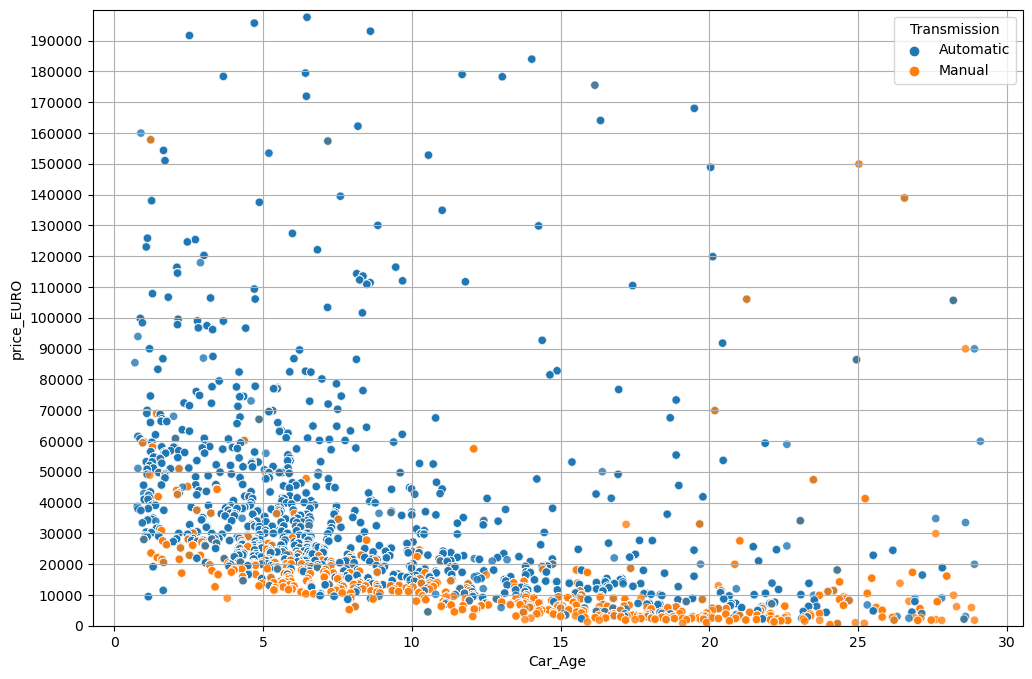

In [46]:
plt.figure(figsize = (12, 8))

sns.scatterplot(x = 'Car_Age', y = 'price_EURO',  data = avg_price, alpha = 0.8, hue = 'Transmission')

plt.ylim(0, 200000)
plt.yticks(range(0,200000, 10000 ))        
plt.grid()
plt.show()

In [47]:
# plt.figure(figsize=(10,8))

# # Use hue for additional categorization if needed
# sns.violinplot(x='Car_Age', y='price_EURO', data=car_df, palette='viridis')

# # Customize labels and title
# plt.xlabel('Car Age')
# plt.ylabel('Price in EURO')
# plt.title('Distribution of Car Prices Across Different Ages')

# # Adjust the orientation of x-axis labels
# plt.xticks(rotation=45)

# # Add a grid for better readability
# plt.grid(True, linestyle='--', alpha=0.7)

# # Show the plot
# plt.show()

In [48]:
# plt.figure(figsize = (14, 10))

# car_df.boxplot(column = 'Car_Age', by = 'price_EURO', showfliers = False )
# plt.xticks(rotation = 90)
# plt.show()

---
### Visualising Correlation 

---

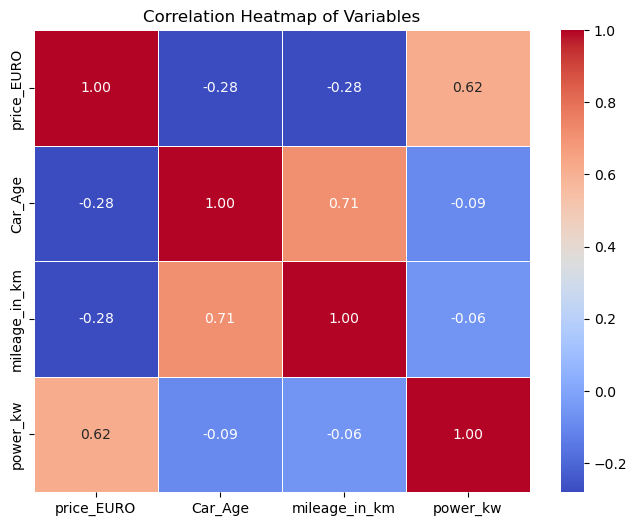

In [49]:
# Assuming car_df is your DataFrame
corr = car_df[['price_EURO', 'Car_Age', 'mileage_in_km', 'power_kw']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the title
plt.title('Correlation Heatmap of Variables')

# Show the plot
plt.show()


It was expected that there would be stronger correlation between **Mileage** and **Price**, negative figure derived suggests weak association between the two but leans towards lower prices as mileage goes up.
**Power** at 0.62 being on the stronger side, indicates that the more power in the vehicle, there is a tendency for a higher priced vehicle.

In [50]:
color_data = car_df['color'].value_counts(normalize=True)
colors = car_df['color'].value_counts(normalize=True).keys()
color_data

color
black     0.234261
grey      0.186674
white     0.161454
silver    0.137095
blue      0.127752
red       0.084833
brown     0.017538
green     0.013954
orange    0.013360
beige     0.009670
yellow    0.007120
bronze    0.002344
gold      0.002315
violet    0.001629
Name: proportion, dtype: float64

In [51]:
explode_values = 10**-3/color_data.values*2
explode_values

array([0.00853748, 0.01071384, 0.0123874 , 0.0145884 , 0.01565528,
       0.02357576, 0.11403825, 0.14333217, 0.14970538, 0.2068224 ,
       0.28088876, 0.85332069, 0.8637452 , 1.22810422])

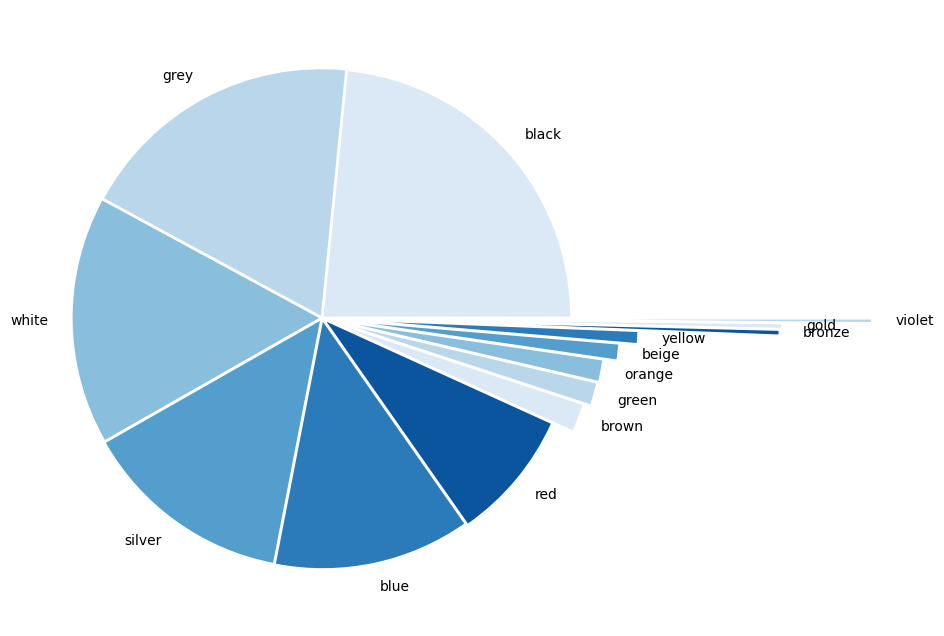

In [52]:
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(color_data,labels=colors,explode=explode_values,radius=1,colors=sns.color_palette('Blues'))
plt.show()

In [53]:
#Power as predictor variable of price


In [54]:
#Obtain indicator variables for 'fuel_type' and 'Transmission'
# # dummy_v = pd.get_dummies(car_df['Fuel_Type'], prefix = 'Fuel_Type')
# dummy_v_ = pd.get_dummies(car_df['Transmission'])


In [55]:
# #Analysis only requires the fuel types that are listed below
# dummy_v.rename(columns={'Fuel_Type_Petrol': 'Petrol', 'Fuel_Type_Diesel': 'Diesel', 'Fuel_Type_Hybrid': 'Hybrid', 'Fuel_Type_LPG': 'LPG', 'Fuel_Type_Electric': 'Electric', 'Fuel_Type_Hydrogen': 'Hydrogen', 'Fuel_Type_Diesel_Hybrid': 'Diesel HYB', 'Transmission_Automatic': 'Automatic', 'Transmission_Manual': 'Manual', 'Transmission_Semi-automatic': 'Semi-Auto'}, inplace=True)
# #I will drop all other columns generated by get_dummies
# dummy_v.drop(columns=dummy_v.filter(like = 'Fuel_Type').columns, inplace = True)


In [56]:
#Merge the data
# car_df = pd.concat([car_df, dummy_v, dummy_v_], axis=1)
# car_df.drop(columns=['Transmission', 'Fuel_Type', 'LPG', 'Hydrogen'], axis = 1, inplace = True)
# car_df.head()

In [57]:
# numerical_columns = ['year', 'price_EURO', 'power_kw']

# # Set up subplots
# fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(12, 8), sharex=True)
# fig.suptitle('Boxplots for Numerical Columns', y=1.02)

# # Plot boxplots for each numerical column
# for i, column in enumerate(numerical_columns):
#     sns.boxplot(x=car_df[column], ax=axes[i], color='skyblue')
#     axes[i].set_xlabel(column)

# plt.tight_layout()
# plt.show()